This notebook contains the portion of my project that involves splitting the data and making a model.

# Research Question:

## Main Question:
- Does the price of purchased jewelry predict what country the customer resides in? (target = country)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [2]:
infile = 'data/Online_Retail_Cleaned'

df = pd.read_csv(infile)
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Target,Jewelry_Present
0,0,536365,85123A,White Hanging Heart T-Light Holder,6,2010-12-01 08:26:00,3.1620,17850.0,United Kingdom,1,0
1,1,536365,71053,White Metal Lantern,6,2010-12-01 08:26:00,4.2036,17850.0,United Kingdom,1,0
2,2,536365,84406B,Cream Cupid Hearts Coat Hanger,8,2010-12-01 08:26:00,3.4100,17850.0,United Kingdom,1,0
3,3,536365,84029G,Knitted Union Flag Hot Water Bottle,6,2010-12-01 08:26:00,4.2036,17850.0,United Kingdom,1,0
4,4,536365,84029E,Red Woolly Hottie White Heart.,6,2010-12-01 08:26:00,4.2036,17850.0,United Kingdom,1,0


In [3]:
# Define X and y based on my question
X = df[['UnitPrice', 'Jewelry_Present']]
y = df['Target']

# split and I want my ratio to be 90% Train, 10% Test, random state will be 50
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.1, random_state=50)

print('Training Data: {}'.format(X_train.shape))
print('Testing Data: {}'.format(X_test.shape))

print(f'\nClass Counts(label, row): Train \n{y_train.value_counts}')
print(f'\nClass Counts(label, row): Test \n{y_test.value_counts}')

print(f'\nData View: X Train \n{X_train.head(3)}')
print(f'\nData View: X Test \n{X_test.head(3)}')

Training Data: (486587, 2)
Testing Data: (486587,)

Class Counts(label, row): Train 
<bound method DataFrame.value_counts of         UnitPrice  Jewelry_Present
130858   143.1208                0
80618      2.0460                0
195607     6.1504                0
135944     3.6580                0
527592     4.0796                0
...           ...              ...
320085     1.0540                0
501513     6.1752                0
102643     3.6580                0
10003      3.1620                0
315971     7.1796                0

[54066 rows x 2 columns]>

Class Counts(label, row): Test 
<bound method IndexOpsMixin.value_counts of 130858    1
80618     1
195607    1
135944    1
527592    1
         ..
320085    1
501513    1
102643    1
10003     1
315971    1
Name: Target, Length: 54066, dtype: int64>

Data View: X Train 
        UnitPrice  Jewelry_Present
111901     4.6500                0
6548       5.2700                0
98871      0.5208                0

Data View: X T

Something to keep in mind is up until this point I have not considered adding more features or normalizing my data or any other tweaks. I hope to see how my model goes and then hopefully we can refine the process. We will now be trying a decision tree model.

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
DT_model = DecisionTreeClassifier()

An error I did not anticipate is that for the decision tree, "Unknown label type: continuous-multioutput. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values." You live and you learn: mistakes are part of the process. We likely need to revisit some preprocessing to fix these errors. 

In [6]:
# trying to tackle the error of continuous-multioutput / continuous value error of decision tree model first
# things that could be causing errors: wrong type, any unanticipated values other than 1 or 0, NaN values.
print(df['Target'].dtype)
print(df['Target'].unique())
print(df['Target'].isnull().sum())

int64
[1 0]
0


It seems like it's not any of these errors, because I have integer (not float) values, no missing values and only 1s and 0s in the target class. We will explore a different route then. Scikit-learn's LabelEncoder function is for encoding target labels, so I will put my y target class through this.

In [7]:
from sklearn.preprocessing import LabelEncoder

X = df[['UnitPrice', 'Jewelry_Present']]
y = LabelEncoder().fit_transform(df['Target'])

# split and I want my ratio to be 90% Train, 10% Test, random state will be 50
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.10, random_state=50)


In [8]:
print(y)
print(y.shape)
print(set(y))

print(y_train.shape)

[1 1 1 ... 0 0 0]
(540653,)
{0, 1}
(54066, 2)


In [9]:
np.unique(y, return_counts=True)

(array([0, 1]), array([ 45319, 495334]))

The issue might be displayed above when we look at my counts: the classes are very disproportionately distributed. One class has only around 45000 while the other has around 495000. It is only here where I also realized I actually previously had the order of the splitting data wrong: I had y_train in the place of X_test, and it split incorrectly which is why I was getting so many errors: I am leaving the code above in here as part of showing that this process can have mistakes, and to show my thought process behind getting out of it.

In [10]:
# split and I want my ratio to be 90% Train, 10% Test, random state will be 50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=50)


In [11]:
my_DT_model = DT_model.fit(X_train, y_train)

y_pred = DT_model.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.01      0.01      4504
           1       0.92      1.00      0.96     49562

    accuracy                           0.92     54066
   macro avg       0.86      0.50      0.48     54066
weighted avg       0.91      0.92      0.88     54066



In [40]:
# make a confusion matrix
confmatrix = confusion_matrix(y_test, y_pred)
confmatrix

array([[   23,  4481],
       [    6, 49556]])

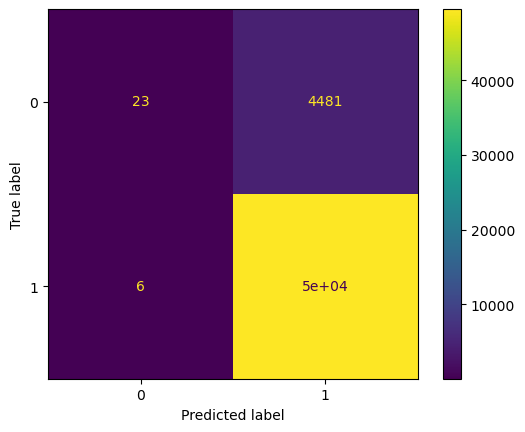

In [41]:
confmatrix_display = ConfusionMatrixDisplay(confusion_matrix=confmatrix, display_labels=DT_model.classes_)
confmatrix_display.plot()
plt.show()

The confusion matrix plus the results of my model indicate that my class imbalance is highly affecting the model right now. Class 0 seems heavily underrepresented, while class 1 seems heavily overrepresented. This makes sense to why the precision and recall are so high for Class 1, but class 0 performs quite poorly. 

In [26]:
# wanted to figure out how to print my results from classification report into a csv: help taken from this thread on 
# Stack Overflow
#https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format

# suggestion was to turn it into a dataframe by having the report returned as a dictionary and transposing it
first_model = classification_report(y_test, y_pred, output_dict=True)
first_model = pd.DataFrame(first_model).transpose()
first_model.head()

,precision,recall,f1-score,support
0,0.793103,0.005107,0.010148,4504.000000
1,0.917075,0.999879,0.956689,49562.000000
accuracy,0.917009,0.917009,0.917009,0.917009
macro avg,0.855089,0.502493,0.483418,54066.000000
weighted avg,0.906748,0.917009,0.877837,54066.000000


In [27]:
# first_model_results = first_model.to_csv('/home/ec2-user/SageMaker/IS597MLC-FinalProj/results/first_model_results')

Now we can start considering fine-tuning the model and playing around with how to make it better. I want to look at my cleaned dataframe and make a correlation matrix of what potentially correlates with what. We make note though of the fact that the seaborn heatmap function is only really designed to handle numerical data, and so we will make a subsetted dataframe for this function, again just to see if there's anything of use: maybe there are numerical features we could use that could help the model's class imbalance.

In [28]:
import seaborn as sns

In [32]:
df.dtypes

Unnamed: 0           int64
InvoiceNo           object
StockCode           object
Description         object
Quantity             int64
InvoiceDate         object
UnitPrice          float64
CustomerID         float64
Country             object
Target               int64
Jewelry_Present      int64
dtype: object

In [35]:
df2 = df.drop(['Unnamed: 0', 'InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'], axis=1)
df2.head()

,Quantity,UnitPrice,CustomerID,Target,Jewelry_Present
0,6,3.1620,17850.0,1,0
1,6,4.2036,17850.0,1,0
2,8,3.4100,17850.0,1,0
3,6,4.2036,17850.0,1,0
4,6,4.2036,17850.0,1,0


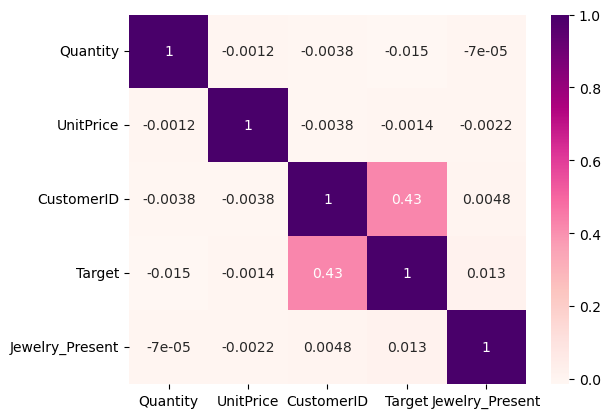

In [36]:
fig, ax = plt.subplots()
sns.heatmap(df2.corr(), cmap='RdPu', annot=True)
plt.show()

This is definitely not a promising correlation matrix between the numerical values. The most promising correlation is between the target and the customer ID, and it's only at about a 0.43. 